# Introduction
#### What is Multivaraite exploratrion of data?
- Multivaraite is the visualization of three or more variables

#### Lesson Overview
1. Non-Positional encodings
2. Color Palettes
3. Faceting in two directions
4. Adaptations of bivaraite plots
5. Plot Matrices
6. Feature Engineering

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

# Non-Positional Encodings for Third Variables
- There are four major cases to consider when we want to plot three variables together:
    1. Three numeric varaibles
    2. two numeric variables and one categorical variable
    3. one numeric variable and two categorical variables
    4. three categorical variables
- A **numeric variable** is a variable where the value has meaning (i,e weight or age) but a value such as phone number doesn't have meaning in the numbers alone
- A **categorical variable** is a variable that holds a type (i.e species or hair color)

<br/>

- If we have atleast two numeric varaibles, one common method for depicting the data is by using a scatterplot to encode two of the numeric varaibles, then using a non positional encoding on the points to convey the value on the third variable, whether numeric or categorical.
- Three main non positional encodings stand out:
    1. shape
    2. size
    3. color

- For Matplotlib and seaborn color is the easiest of these three encodings to apply for a third variable.
- Color can be used to encode both quantitative and qualitative data, with different types of color palletes used for different use cases

### Encoding via shape
- Shape is a good encoding for categorical variables, using one shape for each level of the categorical variable.
- Unfortunately there is no built-in way to automatically assign different shapes in a single call of the `scatter` or `regplot` function. Instead we need to write a loop to call our plotting function mutiple times, isolating data points by categorical level and setting a different 'marker' argument value for each one.

In [5]:
fuel_econ = pd.read_csv('./data/fuel-econ.csv')
fuel_econ.sample(5)

,id,make,model,year,VClass,drive,trans,fuelType,cylinders,displ,pv2,pv4,city,UCity,highway,UHighway,comb,co2,feScore,ghgScore
715,33628,Porsche,911 Carrera S Cabriolet,2014,Minicompact Cars,Rear-Wheel Drive,Manual 7-spd,Premium Gasoline,6,3.8,68,0,18.6331,23.4000,26.3231,37.2000,21.4534,414,5,5
3024,38064,Mercedes-Benz,S600,2017,Large Cars,Rear-Wheel Drive,Automatic 7-spd,Premium Gasoline,12,6.0,0,112,13.4334,16.4000,21.8475,28.6000,16.2496,547,2,2
162,32591,Volvo,S60 FWD,2013,Compact Cars,Front-Wheel Drive,Automatic (S6),Regular Gasoline,5,2.5,0,92,20.7000,26.5000,30.4000,42.4000,24.1705,362,6,6
2220,36475,Hyundai,Sonata,2016,Large Cars,Front-Wheel Drive,Automatic (S6),Regular Gasoline,4,2.0,0,106,22.4655,28.7000,31.0408,44.6000,25.6548,347,6,6
1176,34462,Porsche,911 Turbo,2014,Minicompact Cars,4-Wheel Drive,Automatic (AM-S7),Premium Gasoline,6,3.8,70,0,17.2046,21.4702,24.2994,34.0997,19.8070,449,5,5


In [ ]:
cat_markers = [
    ['A', 'o'],
    ['B', 's'],
]

for cat, marker in cat_markers:
    df_cat = df[df['cat_var1'] == cat]
    plt.scatter(data=df_cat, x='num_var1', y='num_var2', marker=marker)
plt.legend(['A', 'B'])

![](./data/l5-c02-encodings1.png)

- The `o` string specifies **circular** markers for members of category `A` while the `s` string specifies **square** markers for members of category `B`.
- The `legend` function adds a legend to the plot with one marker for every `scatter` call made

(Documentation: [matplotlib built-in markers, marker reference example](https://matplotlib.org/stable/api/markers_api.html))

- From the positional encodings in the plot, you can see that there is a modest positive relationship between the two numeric variables.
- Adding the categorical variable via shape encoding, we can see that points of category 'A' tend to be smaller than those of category 'B' in terms of the numeric x-variable ("num_var1").
- Neither category seems to have an advantage in terms of variability or value for the numeric y-variable ("num_var2").

### Encoding via Size
- Point size is a good encoding for numeric variables. Usually, we want the numeric values to be proportional to the area of the point markers; this is the default functionality of the "s" parameter in `scatter`
- (You need to refer to "s" through a dictionary assigned to the "scatter_kws" parameter when working with regplot.)

In [ ]:
plt.scatter(data=df, x='num_var1', y='num_var2', s='num_var3')

# dummy series for adding legend
sizes = [20, 35, 50]
base_color = sb.color_palette()[0]
legend_obj = []
for s in sizes:
    legend_obj.append(plt.scatter([], [], s=s, color=base_color))
plt.legend(legend_obj, sizes)

![](./data/l5-c02-encodings2.png)

- As noted above, legend will only create one legend entry per plot function call, we need to create additional dummy scatter objects with reference sizes to create the plot.
- The color is fixed so that all of the legend entries have the same color, and two arguments are provided to the legend function:
    * the list of plotting objects to depict in the legend
    * their labels

- The size encoding for the third numeric variable ("num_var3") shows that its values are largest in the 'middle' of the distribution of values, and smaller on the upper and bottom edges. It is also clear that size is much less precise at encoding than position, so it is better used to make general qualitative judgments than precise judgments.
- In the case of the example, the data was scaled in a way that the marker sizes made sense as given. You might need to apply a scaling factor (e.g., multiplying or dividing all values by 2) or shift in order to make the size encoding interpretable. In particular, if the values in your third numeric variable include negative values, then you might want to choose a color encoding instead.
- _Both scaling and shifting the values are ways to make the encoding more easily visible._

### A warning on combining encodings
- It might seem plausible to combine both size and shape encodings into the same plot, to depict the trend in four variables at once.
- Technically, this may be true, but there are some cautions to be taken with this approach.
- One surface issue is that the code to depict the plot and a reasonable legend gets complicated.
- A more important issue is that point areas won't all be the same even with the same value, depending on the shape of the marker

([], [])

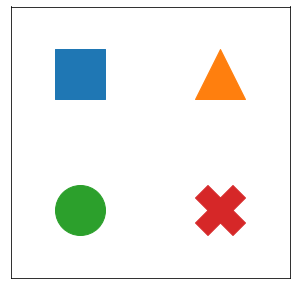

In [6]:
plt.figure(figsize=[5, 5])

common_size = 2500
plt.scatter([0], [1], marker='s', s=common_size)
plt.scatter([1], [1], marker='^', s=common_size)
plt.scatter([0], [0], marker='o', s=common_size)
plt.scatter([1], [0], marker='X', s=common_size)

# a little bit of aesthetic cleaning
plt.xlim(-0.5, 1.5)
plt.xticks([])
plt.ylim(-0.5, 1.5)
plt.yticks([])

- Despite having the same "s" values, the triangle, circle, and X markers all look smaller (have a smaller area) than the square. Perhaps this isn't a major concern, considering that size is better used as a qualitative measure for exploration. But it's still something to consider

# Color Palettes
- Coloe is a common encoding for variables, for both qualitative and quantitative variables
- We've used;
    1. color for category in a clustered bar chart
    2. color for count in a heatmap (2-D histogram and as a 2-D bar chart)

##### Objective
- How to employ color in scatterplots
- Color palette choices depending on the data you have

If you have a qualitative variable you can set different colors for different levels of a categorical variable through the `hue` parameter on seaborn's [FacetGrid](https://seaborn.pydata.org/generated/seaborn.FacetGrid.html) class

In [ ]:
g = sb.FacetGrid(data=df, hue='cat_var1', size=5)
g.map(plt.scatter, 'num_var1', 'num_var2')
g.add_legend()

![](./data/l5-c03-color1.png)

__points of category A tend to be smaller than category B on "num_var1" for the x-axis, and there doesn't appear to be any interaction with "num_var2" as depicted on the y-axis.__

- For quantitative variables we should not take the same approach, since **FacetGrid** expects any variable input for subsetting to be categorical
- Instead we set color based on numeric value in the `scatter` function through the `c` parameter, much like how we set up marker sizes through `s`. (Unlike with size, we don't have an easy way of setting color by numeric value through regplot due to how its "color" argument is set up.)

In [ ]:
plt.scatter(data=df, x='num_var1', y='num_var2', c='num_var3')
plt.colorbar()

![](./data/l5-c03-color2.png)

- When points lie further away from the central line through the data, the value on the third variable decreases.
- Compared to the size encoding, we have a more precise idea of value on the third variable, though certainly not as precise as positional encodings.

__Color Palletes__
- Depending on the type of data you have you might want to change the type of color palette that you use to depict your data
- There are three major classes of color palette to consider
    1. Qualitative
    2. Sequential
    3. Diverging

![](./data/screen-shot-2021-05-27-at-8.12.10-am.png)

- **Qualitataive** palettes are buid for nominal-typed data.
- This is the palette class taken by the default palette

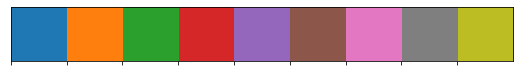

In [4]:
sb.palplot(sb.color_palette(n_colors=9))

- In a qualitative palette, consecutive color values are distinct so that there is no inherent ordering of levels implied
- Colors in a good qualitative palette should also try and avoid drastic changes in brightness and saturation that would cause a reader to interpret one category as being more important than the others - unless that emphasis is deliberate and purposeful.

For other types of data (ordinal and numeric), a choice may need to be made between a sequential scale and a diverging scale.

- In a **sequential** palette, consecutive color values should follow each other systematically.
- Typically, this follows a light-to-dark trend across a single or small range of hues, where light colors indicate low values and dark colors indicate high values.
- The default sequential color map, "viridis", takes the opposite approach, with dark colors indicating low values, and light values indicating high.

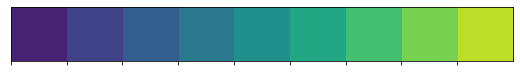

In [5]:
sb.palplot(sb.color_palette('viridis', 9))

- Most of the time, a sequential palette will depict ordinal or numeric data just fine.
- However, if there is a meaningful zero or center value for the variable, you may want to consider using a **diverging** palette.
- In a diverging palette, two sequential palettes with different hues are put back to back, with a common color (usually white or gray) connecting them.
- One hue indicates values greater than the center point, while the other indicates values smaller than the center.

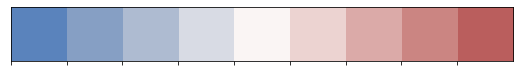

In [6]:
sb.palplot(sb.color_palette('vlag', 9))

### Selecting color palettes
- If you want to change the color map for your plot, the easiest way of doing so is by using one of the built-ins from Matplotlib or Seaborn.

- [This part](https://matplotlib.org/stable/api/pyplot_summary.html) of the Matplotlib documentation has a list of strings that can be understood for color mappings. For most of your purposes, stick with the palettes noted in the top few tables as built-in for Matplotlib ('viridis', etc.) or from ColorBrewer; the remaining palettes may not be as perceptually consistent. Seaborn also adds in a number of its own palettes:
    1. **Qualitative** (all up to 6 colors): 'deep', 'pastel', 'dark', 'muted', 'bright', 'colorblind'
    2. **Sequential**: 'rocket' (white-orange-red-purple-black), 'mako' (mint-green-blue-purple-black)
    3. **Diverging**: vlag' (blue-white-red), 'icefire' (blue-black-orange)
- For all of these strings, appending '_r' reverses the palette, which is useful if a sequential or diverging palette is rendered counter to your expectations.
- A color palette can be set in **FacetGrid** through the "palette" parameter, and in scatter through the "cmap" parameter.

In [ ]:
g = sb.FacetGrid(data=df, hue='cat_var1', size=5, palette='colorblind')
g.map(plt.scatter, 'num_var1', 'num_var2')
g.add_legend()

![](./data/l5-c03-color6.png)

In [ ]:
plt.scatter(data=df, x='num_var1', y='num_var2', c='num_var3', cmap='mako_r')
plt.colorbar()

![](./data/l5-c03-color7.png)

- When using a diverging color palette, you will likely need to specify the "vmin" and "vmax" parameters in order to have the neutral point in the palette meet the center point in the scale.
- Alternatively, solutions that create a different normalization function like the one posted in [this Stack Overflow thread](https://stackoverflow.com/questions/20144529/shifted-colorbar-matplotlib) can be used for finer control over the color map.
- Diverging color scales are common enough for the heatmap type that there is a "center" parameter for setting the central value.

### Warnings on Color
- Considerations;
    1. consider color blindness when selecting color for your plots - You don't want your visualization to shut out the 8% of the population that have some kind of color vision deficiency (the built in color palettes minimize these concerns)
- If you use a different, or custom palette, it might be worth checking your visualization's interpretability through a color blindness simulator like [this one](http://www.color-blindness.com/coblis-color-blindness-simulator/)
     2. be aware of the effect of transparency and overlap on interpretability
- If points of different color on a qualitative scale overlap, the result may be a third color that cannot be matched to something in the palette.
- If multiple points on a quantitative scale overlap, then the result may be a value that does not actually exist in the data.
- To be safe here, avoid or minimize transparency in plots with color. You may need to plot only a sample of your points in order to make sure that the effect of the third variable is clearly visible.

([], [])

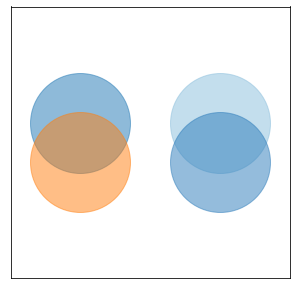

In [9]:
plt.figure(figsize=[5, 5])

# left: qualitative points
plt.scatter(0, 0.5, s=1e4, color=sb.color_palette()[0], alpha=0.5)
plt.scatter(0, -0.5, s=1e4, color=sb.color_palette()[1], alpha=0.5)

# right: quantitative points
plt.scatter(1, 0.5, s=1e4, color=sb.color_palette('Blues')[2], alpha=0.5)
plt.scatter(1, -0.5, s=1e4, color=sb.color_palette('Blues')[4], alpha=0.5)

# set axes for point overlap
plt.xlim(-0.5, 1.5)
plt.ylim(-3.5, 3.5)
plt.xticks([])
plt.yticks([])

#### Further Reading
1. Matplotlib tutorial: [Colormaps in Matplotlib](https://matplotlib.org/stable/tutorials/colors/colormaps.html)
2. Seaborn tutorial: [Choosing color palettes](https://seaborn.pydata.org/tutorial/color_palettes.html)

## Quiz
- Task 1: Look at the relationship between the Pokémon combat statistics of Speed, Defense, and Special-Defense. If a Pokémon has higher defensive statistics, does it necessarily sacrifice speed? Create a single plot to depict this relationship.

In [10]:
pokemon = pd.read_csv('./data/pokemon.csv')
pokemon.head()

,id,species,generation_id,height,weight,base_experience,type_1,type_2,hp,attack,defense,speed,special-attack,special-defense
0,1,bulbasaur,1,0.7,6.9,64,grass,poison,45,49,49,45,65,65
1,2,ivysaur,1,1.0,13.0,142,grass,poison,60,62,63,60,80,80
2,3,venusaur,1,2.0,100.0,236,grass,poison,80,82,83,80,100,100
3,4,charmander,1,0.6,8.5,62,fire,NaN,39,52,43,65,60,50
4,5,charmeleon,1,1.1,19.0,142,fire,NaN,58,64,58,80,80,65


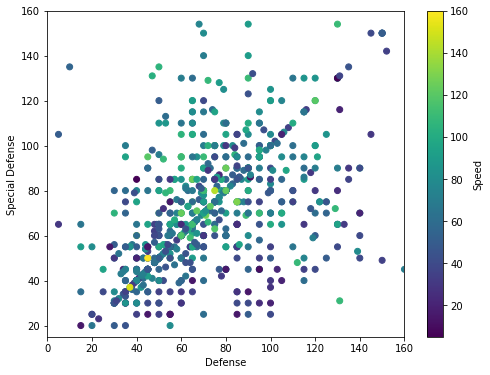

In [12]:
def encodings_solution_1():
    # data setup
    pokemon = pd.read_csv('./data/pokemon.csv')
    # plotting
    plt.figure(figsize=[8, 6])
    plt.scatter(data=pokemon, x='defense', y='special-defense', c='speed')
    plt.colorbar(label='Speed')
    plt.xlim(0, 160)
    plt.ylim(15, 160)
    plt.xlabel('Defense')
    plt.ylabel('Special Defense')

encodings_solution_1()

- From the plot as given, I see a slight increase in speed as both defense and special defense increase. However, the brightest points seem to be clumped up in the center in the 60-80 defense and special defense ranges with the two brightest points on the lower left of the diagonal.
- I might want to apply some manual jitter to the data since I suspect there to be a lot of overlapping points. 

- To complete the second task, we need to first reshape the dataset so that all Pokémon types are recorded in a single column. This will add duplicates of Pokémon with two types, which is fine for the task to be performed.

In [11]:
type_cols = ['type_1', 'type_2']
non_type_cols = pokemon.columns.difference(type_cols)
pkmn_types = pokemon.melt(id_vars=non_type_cols, value_vars=type_cols, var_name='type_level', value_name='type').dropna()
pkmn_types.head()

,attack,base_experience,defense,generation_id,height,hp,id,special-attack,special-defense,species,speed,weight,type_level,type
0,49,64,49,1,0.7,45,1,65,65,bulbasaur,45,6.9,type_1,grass
1,62,142,63,1,1.0,60,2,80,80,ivysaur,60,13.0,type_1,grass
2,82,236,83,1,2.0,80,3,100,100,venusaur,80,100.0,type_1,grass
3,52,62,43,1,0.6,39,4,60,50,charmander,65,8.5,type_1,fire
4,64,142,58,1,1.1,58,5,80,65,charmeleon,80,19.0,type_1,fire


- Task 2: How do weights and heights compare between Fairy type Pokémon and Dragon type Pokémon?
- You may want to subset your dataframe before proceeding with the plotting code.

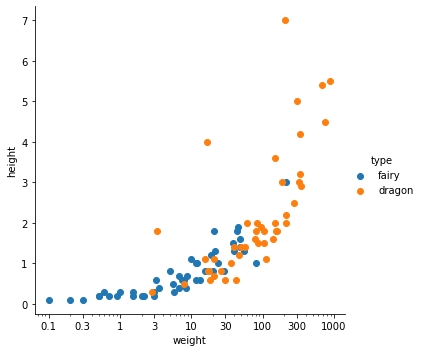

In [14]:
def encodings_solution_2():
    # data setup
    pokemon = pd.read_csv('./data/pokemon.csv')
    type_cols = ['type_1', 'type_2']
    non_type_cols = pokemon.columns.difference(type_cols)
    pkmn_types = pokemon.melt(id_vars=non_type_cols, value_vars=type_cols, var_name='type_level', value_name='type').dropna()
    pokemon_sub = pkmn_types.loc[pkmn_types['type'].isin(['fairy', 'dragon'])]
    # plotting
    g = sb.FacetGrid(data=pokemon_sub, hue='type', height=5)
    g.map(plt.scatter, 'weight', 'height')
    g.set(xscale='log')  # need to set scaling before customizing ticks
    x_ticks = [0.1, 0.3, 1, 3, 10, 30, 100, 300, 1000]
    g.set(xticks=x_ticks, xticklabels=x_ticks)
    g.add_legend()

encodings_solution_2()

- The plot shows the drastic difference in sizes and weights for the Fairy and Dragon Pokemon types.

# Faceting in two directions
- We've seen how FacetGrid can be used to subset your dataset across levels of a categorical variable, and then create one plot for each subset
- Where the faceted plots demonstrated were univariate before, you can actually use any plot type, allowing you to facet bivariate plots to create a multivariate visualization.

In [ ]:
g = sb.FacetGrid(data=df, col='cat_var1', size=4)
g.map(sb.boxplot, 'cat_var2', 'num_var2')

![](./data/l5-c05-faceting1.png)

- The faceted box plot suggests a slight interaction between the two categorical variables, where, in level B of "cat_var1", the level of "cat_var2" seems to be have a larger effect on the value of "num_var2", compared to the trend within "cat_var1" level A.

- **FacetGrid** also allows for faceting a variable not just by columns, but also by rows
- We can set one categorical variable on each of the two facet axes for one additional method of depicting multivariate trends.

In [ ]:
g = sb.FacetGrid(data=df, col='cat_var2', row='cat_var1', size=2.5,margin_titles=True)
g.map(plt.scatter, 'num_var1', 'num_var2')

![](./data/l5-c05-faceting2.png)

- Setting `margin_titles = True` means that instead of each facet being labeled with the combination of row and column variable, labels are placed separately on the top and right margins of the facet grid. This is a boon, since the default plot titles are usually too long.

# Other Adaptations of Bivariate Plots
- We've looked at ways of expanding unvariate plots into bivariate plots; substituting count on a bar chart or histogram for the mean, median or some other statistic of a second variable.
- This adaptation can also be done for bivariate plots like the heat map, clustered bar chart, and line plot, to allow them to depict multivariate relationships.
- If we want to depict the mean of a third variable in a 2-d histogram, we need to change the weights of points in the hist2d function similar to how we changed the weights in the 1-d histogram.

In [ ]:
xbin_edges = np.arange(0.25, df['num_var1'].max()+0.5, 0.5)
ybin_edges = np.arange(7,    df['num_var2'].max()+0.5, 0.5)

# count number of points in each bin
xbin_idxs = pd.cut(df['num_var1'], xbin_edges, right=False,include_lowest=False, labels=False).astype(int)
ybin_idxs = pd.cut(df['num_var2'], ybin_edges, right=False,include_lowest=False, labels=False).astype(int)

pts_per_bin = df.groupby([xbin_idxs, ybin_idxs]).size()
pts_per_bin = pts_per_bin.reset_index()
pts_per_bin = pts_per_bin.pivot(index='num_var1', columns='num_var2').values

z_wts = df['num_var3'] / pts_per_bin[xbin_idxs, ybin_idxs]

# plot the data using the calculated weights
plt.hist2d(data=df, x='num_var1', y='num_var2', weights=z_wts,bins=[xbin_edges, ybin_edges], cmap='viridis_r', cmin=0.5)
plt.xlabel('num_var1')
plt.ylabel('num_var2')
plt.colorbar(label='mean(num_var3)')

![](data/l5-c06-adaptations1.png)

- Considering how few data points there are in the example, and how cleanly the third variable is distributed, the adapted heat map is a bit excessive in terms of work. - The low level of point overlap observed earlier means that the scatterplot with color or size encoding was sufficient for depicting the data. You'll be more likely to use the heat map if there is a lot of data to be aggregated.

- For the **2-D** bar chart only the aggreagation of values changes.
- Instead of taking size after the groupby operation, we compute the mean across dataframe columns and isolate the column of interest.

In [ ]:
cat_means = df.groupby(['cat_var1', 'cat_var2']).mean()['num_var2']
cat_means = cat_means.reset_index(name='num_var2_avg')
cat_means = cat_means.pivot(index='cat_var2', columns='cat_var1',values='num_var2_avg')
sb.heatmap(cat_means, annot=True, fmt='.3f',cbar_kws={'label': 'mean(num_var2)'})

![](data/l5-c06-adaptations2.png)

- An alternative approach for two categorical variables and one numeric variable is to adapt a clustered bar chart using the `barplot` function instead of the `countplot` function:

In [ ]:
ax = sb.barplot(data=df, x='cat_var1', y='num_var2', hue='cat_var2')
ax.legend(loc=8, ncol=3, framealpha=1, title='cat_var2')

![](data/l5-c06-adaptations3.png)

- The "hue" parameter can also be used in a similar fashion in the `boxplot`, `violinplot`, and `pointplot` functions to add a categorical third variable to those plots in a clustered fashion
- As a special note for `pointplot`, the default rendering aligns all levels of the "hue" categorical variable vertically. Use the "dodge" parameter to shift the levels in a clustered fashion:

In [ ]:
ax = sb.pointplot(data=df, x='cat_var1', y='num_var2', hue='cat_var2',dodge=0.3, linestyles="")

![](data/l5-c06-adaptations4.png)

- As a final example, a **line plot** can be adapted from previous code showing how to create frequency polygons for levels of a categorical variable. In this case as well, we create a custom function to send to a FacetGrid object's map function that computes the means in each bin, then plots them as lines via errorbar.

In [ ]:
def mean_poly(x, y, bins=10, **kwargs):
    """ Custom adapted line plot code. """
    # set bin edges if none or int specified
    if type(bins) == int:
        bins = np.linspace(x.min(), x.max(), bins+1)
    bin_centers = (bin_edges[1:] + bin_edges[:-1]) / 2

    # compute counts
    data_bins = pd.cut(x, bins, right=False,include_lowest=True)
    means = y.groupby(data_bins).mean()

    # create plot
    plt.errorbar(x=bin_centers, y=means, **kwargs)


bin_edges = np.arange(0.25, df['num_var1'].max()+0.5, 0.5)
g = sb.FacetGrid(data=df, hue='cat_var2', size=5)
g.map(mean_poly, "num_var1", "num_var2", bins=bin_edges)
g.set_ylabels('mean(num_var2)')
g.add_legend()

![](data/l5-c06-adaptations5.png)

## Quiz
##### Task 1
- Plot the city ('city') vs. highway ('highway') fuel efficiencies (both in mpg) for each vehicle class ('VClass'). Don't forget that vehicle class is an ordinal variable with levels {Minicompact Cars, Subcompact Cars, Compact Cars, Midsize Cars, Large Cars}.

In [2]:
# prerequisite package imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

/home/mark/anaconda3/envs/data_analysis/lib/python3.9/site-packages/seaborn/axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


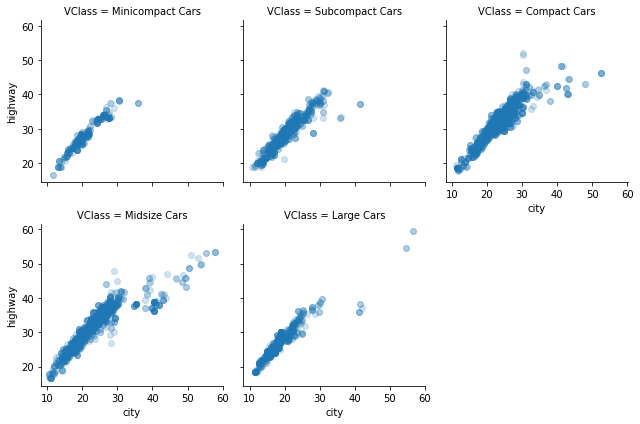

In [4]:
def adaptedplot_solution_1():
    # data setup
    fuel_econ = pd.read_csv('./data/fuel-econ.csv')
    sedan_classes = ['Minicompact Cars', 'Subcompact Cars','Compact Cars', 'Midsize Cars', 'Large Cars']
    pd_ver = pd.__version__.split(".")
    if (int(pd_ver[0]) > 0) or (int(pd_ver[1]) >= 21):  # v0.21 or later
        vclasses = pd.api.types.CategoricalDtype(ordered=True, categories=sedan_classes)
        fuel_econ['VClass'] = fuel_econ['VClass'].astype(vclasses)
    else:  # compatibility for v.20
        fuel_econ['VClass'] = fuel_econ['VClass'].astype('category', ordered=True, categories=sedan_classes)
    # plotting
    g = sb.FacetGrid(data=fuel_econ, col='VClass', size=3, col_wrap=3)
    g.map(plt.scatter, 'city', 'highway', alpha=1/5)

adaptedplot_solution_1()

Approach: Faceting due to overplotting
- There don't seem to be any obvious differences in the main cluster across vehicle classes, except that the minicompact and large sedans' arcs are thinner than the other classes due to lower counts.
- The faceted plots clearly show that most of the high-efficiency cars are in the mid-size and compact car classes.

##### Task 2
- Plot the relationship between engine size ('displ', in liters), vehicle class, and fuel type ('fuelType'). For the lattermost feature, focus only on Premium Gasoline and Regular Gasoline cars. What kind of relationships can you spot in this plot?

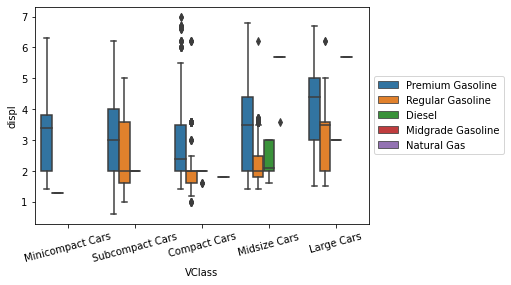

In [5]:
def adaptedplot_solution_2():
    # data setup
    fuel_econ = pd.read_csv('./data/fuel-econ.csv')
    sedan_classes = ['Minicompact Cars', 'Subcompact Cars','Compact Cars', 'Midsize Cars', 'Large Cars']
    pd_ver = pd.__version__.split(".")
    if (int(pd_ver[0]) > 0) or (int(pd_ver[1]) >= 21):  # v0.21 or later
        vclasses = pd.api.types.CategoricalDtype(
            ordered=True, categories=sedan_classes)
        fuel_econ['VClass'] = fuel_econ['VClass'].astype(vclasses)
    else:  # compatibility for v.20
        fuel_econ['VClass'] = fuel_econ['VClass'].astype(
            'category', ordered=True, categories=sedan_classes)
        fuel_econ_sub = fuel_econ.loc[fuel_econ['fuelType'].isin(
            ['Premium Gasoline', 'Regular Gasoline'])]
    # plotting
    sb.boxplot(data=fuel_econ, x='VClass', y='displ', hue='fuelType')
    plt.legend(loc=6, bbox_to_anchor=(1.0, 0.5))  # legend to right of figure
    plt.xticks(rotation=15)

adaptedplot_solution_2()

Approach:  clustered box plot since there were too many levels to make a clustered violin plot accessible
- The plot shows that in each vehicle class, engine sizes were larger for premium-fuel cars than regular-fuel cars.
- Engine size generally increased with vehicle class within each fuel type, but the trend was noisy for the smallest vehicle classes.

# Plot Matrices
- You might want to look at the relationship between many pairs of variables
- Rather than generate bivariate plots one by one, a preliminary option you might consider for exploration is the creation of a **plot matrix**
- In a plot matrix, a matrix of plots is generated. Each row and column represents a different variable, and a subplot against those variables is generated in each plot matrix cell. This contrasts with faceting, where rows and columns will subset the data, and the same variables are depicted in each subplot.
- Seaborn's [PairGrid](https://seaborn.pydata.org/generated/seaborn.PairGrid.html) class facilitates the creation of this kind of plot matrix.

By default, PairGrid only expects to depict numeric variables; a typical invocation of PairGrid plots the same variables on the horizontal and vertical axes.
On the diagonals, where the row and column variables match, a histogram is plotted. Off the diagonals, a scatterplot between the two variables is created.

In [ ]:
g = sb.PairGrid(data=df, vars=['num_var1', 'num_var2', 'num_var3'])
g.map_diag(plt.hist)
g.map_offdiag(plt.scatter)

![](data/l5-c08-plotmatrices1.png)

- The `pairplot` function can also be used to render this common use case in a single call.
- For other relationships, the flexibility of PairGrid shines. For example, if we want to look at the relationship between the numeric and categorical variables in the data, we need to set the different variable types on the rows and columns, then use an appropriate plot type for all matrix cells.

In [ ]:
g = sb.PairGrid(data=df, x_vars=['num_var1', 'num_var2', 'num_var3'], y_vars=['cat_var1', 'cat_var2'])
g.map(sb.violinplot, inner='quartile')

![](data/l5-c08-plotmatrices2.png)

### Correlation Matrices
- While pandas `.corr` function is perfectly fine for computing and returning a matrix of correlation coefficients, it's not too much trouble to plot the matrix as a heat map to make it easier to see the strength of the relationships.
- Instead of using the default sequential color map, a diverging color map is specified and its center is set to 0. That way, we can use hue to tell if a correlation is positive or negative, and see its strength from the hue's intensity.

In [ ]:
sb.heatmap(df.corr(), annot=True, fmt='.2f', cmap='vlag_r', center=0)

![](data/l5-c08-plotmatrices3.png)

- Correlations are computed based on strength of linear relationships

# Feature Engineering
- As you explore a dataset, you might find that two variables are related in some way.
- **Feature engineering** is all about creating a new variable with a sum, difference, product, or ratio between those original variables that may lend a better insight into the research questions you seek to answer.
- For example, if you have one variable that gives a count of crime incidents, and a second one that gives population totals, then you may want to engineer a new variable by dividing the former by the latter, obtaining an incident rate. 
- This would account for a possible relationship between the original features where if there are more people, there might naturally be more chances for crimes to occur. If we looked at the raw counts rather than the incident rate, we risk just seeing information about population sizes rather than what we might really want.
- Another way that you can perform feature engineering is to use the `cut` function to divide a numeric variable into ordered bins.

# How Much is Too Much?
- It is so important to approach data exploration systematically, rather than just throw as many variables together as possible immediately.
- When you move from univariate visualizations to bivariate visualizations, you augment your previous understanding of individual distributions by seeing how they relate to one another.
- If you look at pairwise visualizations before putting together a trivariate plot, then you will have a clear view to how the interaction, if present, changes your previous understanding of the marginal pairwise relationship
- When you move on to explanatory data visualizations, try to limit the number of variables that are introduced at the same time and make sure that the encoding choices convey the main findings to your reader in the clearest way possible.
- While it's good to keep a soft limit of about three or four variables in a single visualization, you can exceed this if the trends are clear or you introduce features to your reader in a systematic way.

## Quiz
##### Task 1
*  Practice creating a plot matrix, by depicting the relationship between five numeric variables in the fuel efficiency dataset: 'displ', 'co2', 'city', 'highway', and 'comb'. Do you see any interesting relationships that weren't highlighted previously?

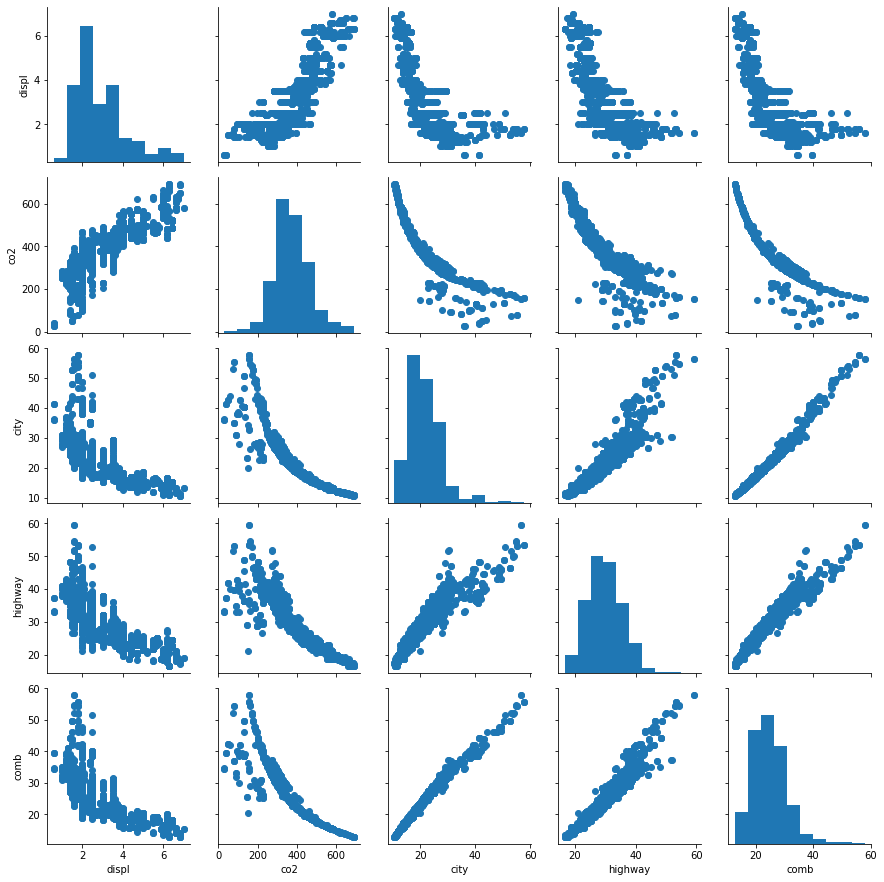

In [4]:
def additionalplot_solution_1():
    # data setup
    fuel_econ = pd.read_csv('./data/fuel-econ.csv')
    # plotting
    g = sb.PairGrid(data=fuel_econ, vars=['displ', 'co2', 'city', 'highway', 'comb'])
    g.map_diag(plt.hist)
    g.map_offdiag(plt.scatter)

additionalplot_solution_1()

- __The intersections where 'co2' meets the fuel mileage measures are fairly interesting in how tight the curves are__

##### Task 2
*  The output of the preceding task pointed out a potentially interesting relationship between co2 emissions and overall fuel efficiency. Engineer a new variable that depicts CO2 emissions as a function of gallons of gas (g / gal). (The 'co2' variable is in units of g / mi, and the 'comb' variable is in units of mi / gal.) Then, plot this new emissions variable against engine size ('displ') and fuel type ('fuelType'). For this task, compare not just Premium Gasoline and Regular Gasoline, but also Diesel fuel.

/home/mark/anaconda3/envs/data_analysis/lib/python3.9/site-packages/seaborn/axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


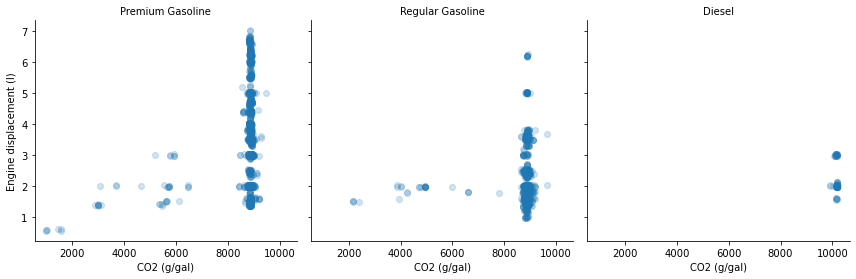

In [6]:
def additionalplot_solution_2():
    # data setup
    fuel_econ = pd.read_csv('./data/fuel-econ.csv')
    fuel_econ['co2_gal'] = fuel_econ['comb'] * fuel_econ['co2']
    fuel_econ_sub = fuel_econ.loc[fuel_econ['fuelType'].isin(
        ['Premium Gasoline', 'Regular Gasoline', 'Diesel'])]
    # plotting
    g = sb.FacetGrid(data=fuel_econ_sub, col='fuelType', size=4, col_wrap=3)
    g.map(sb.regplot, 'co2_gal', 'displ', y_jitter=0.04, fit_reg=False, scatter_kws={'alpha': 1/5})
    g.set_ylabels('Engine displacement (l)')
    g.set_xlabels('CO2 (g/gal)')
    g.set_titles('{col_name}')

additionalplot_solution_2()

- Engine sizes are smaller for cars that use regular gasoline against those that use premium gas.
- Most cars fall in an emissions band a bit below 9 kg CO2 per gallon; diesel cars are consistently higher, a little above 10 kg CO2 per gallon. This makes sense, since a gallon of gas gets burned no matter how efficient the process.
- More strikingly, there's a smattering of points with much smaller emissions. If you inspect these points more closely you'll see that they represent hybrid cars that use battery energy in addition to conventional fuel!
- To pull these mechanically out of the dataset requires more data than that which was trimmed to create it - and additional research to understand why these points don't fit the normal CO2 bands.